# Make Your PSF Grow (Part 3)
### Exploring Growth Strategies

## Reaching The "Easy Cash Target"

OK - so how can we go about finding the right growth strategy? What is the maximum we can achieve given the conditions defined above?

First of all, I think it is worth noting something about the challenge itself - don't forget we have developed a very clear conceptual model of how our business works and we even have full information regarding the quantities involved. Yet the problem still isn't easy to solve - and of course a real business is even more complex.

So one imporant learning is that even if you have a good conceptual understanding of how your business works,  this understanding alone still doesn't mean you will be able to make better decisions.

In this case, you need to go a step further and use what I like to call "computational thinking"... this involves taking all the parameters we identified in our conceptual model, quantifying them and relating them to each other using simple equations. Once you have a feeling for the numbers, you can start working out a solution.

Ultimately, the best thing to do is to use the System Dynamics model we build in the last chapter.

But whatever kind of situation I am prototyping, once I have a conceptual model and some concrete quantities for the elements in the model I first like to write down the key equations and crunch the numbers using pencil and paper - that gives me a good sense of where the diffcult issues lie. Once I have figured those out, I can then build a more sophisticated model using a spreadsheet or some other modeling tool if necessary.

It doesn't really matter which tool you use, what is important is that you actually do some computation because this will give you some feeling for the numbers involved. 

In practice, quantifying your model may take some time because you will have to do some data mining first to arive at the quantities you need (e.g. answering questions such as "how much effort do we spend on business development vs. project delivery, on average?") - I mostly work with educated guess for the figures I don't know, that way I can start building and testing the quantitative model while the data mining work is going on.

But in our concrete case we're lucky, because the quantification has already been provided for us by the instructions for the game, so we can dive right in. 

Let's do a few quick calcuations to make sure we understand the numbers... the company has 200 professional staff members, 20% of which are assigned to business development. This means that 160 persons are continuously working on projects. The initial project backlog has 320 months in absolute terms, i.e. the backlog relative to the number of project staff is  2 months into the future. This backlog will remain constant in the steady state "base case" scenario - I've plotted this below and you can recreate this curve in the game if you set the number of people you hire to 0 and the percentage of staff allocated to business development to 20%.

In [1]:
import pandas as pd
from BPTK_Py import bptk
bptk=bptk()

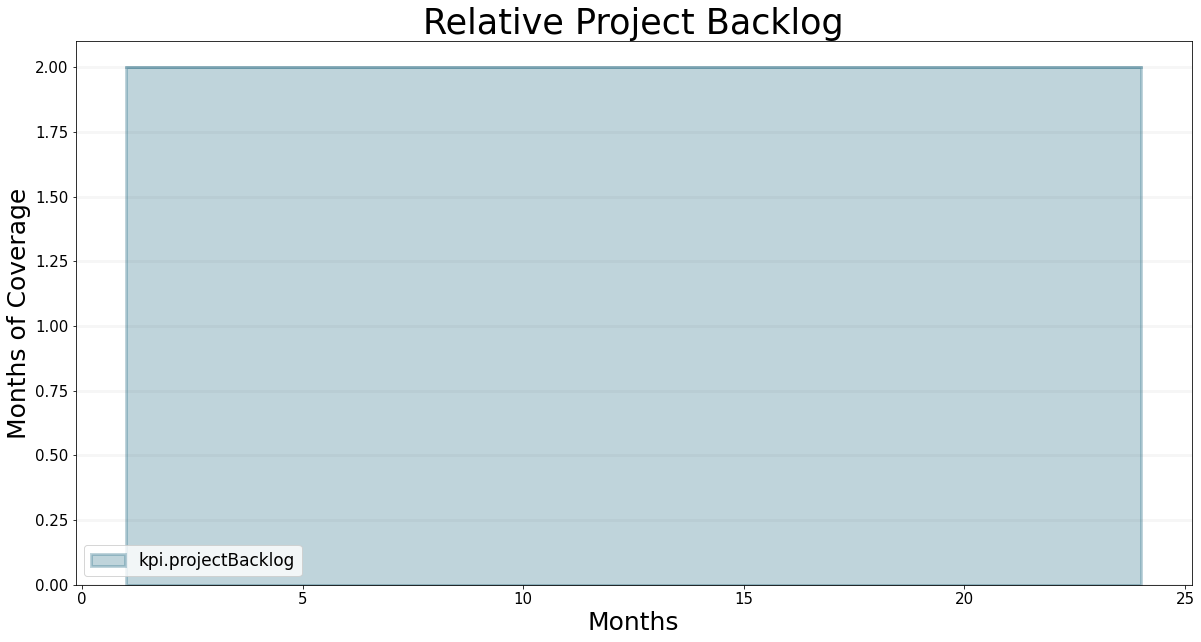

In [2]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base'], 
    equations=["kpi.projectBacklog"],
    title="Relative Project Backlog",
    x_label="Months",
    y_label="Months of Coverage"
)

Hiring people always costs money, in our case the wages and extra workplace cost. To make the right hiring decisions we therefore need to know how much money we can spend on new hires. To work that out we need to look at the PSFs cash flow.

Let's look at the revenue side first. Initially, the PSF is fully booked and working at a rate of 160 person months per month, so the company is making EUR 160 * 17600 = 2,816,000 per month of revenue from projects.

The cost side is a little more intricate: each staff member costs EUR 100000/12=8333 on salaries and an extra EUR 1000 workplace cost, i.e. EUR 9333. At 200 persons in the company, this sums to EUR 414,615 in staff cost. We also have overhead cost of EUR 306,000 per month, so the total cost is at EUR 1,839,333.

Putting all these figures together leads to a cash inflow of EUR 976,667 per month. I've summarized these figures in the table below:

In [3]:
df_psf_base=bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base'], 
    equations=["cash.cash","revenue.revenue","cost.overheadCost","cost.staffCost","cash.easyTargetCash","revenue.projectDeliveryFee","revenue.collectionTime"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True
)

In [4]:
totalRevenue=df_psf_base["revenue.revenue"].iloc[0]*1000
staffCost=df_psf_base["cost.staffCost"].iloc[0]*1000
overheadCost=df_psf_base["cost.overheadCost"].iloc[0]*1000
totalCost=staffCost+overheadCost
cashFlow=totalRevenue-totalCost
initialCash=1000000
cash2Years=23*cashFlow+initialCash

In [5]:
data_psf_base = [["Revenue", totalRevenue]
, ["Staff Cost",staffCost]
, ["Overhead Cost", overheadCost]
, ["Total Cost", totalCost]
, ["Cash Flow", cashFlow]] 

df_psf_base_total = pd.DataFrame(data_psf_base, columns = ["Position", "Value"]) 
df_psf_base_total.set_index("Position").astype(int)

,Value
Position,
Revenue,2816000
Staff Cost,1533333
Overhead Cost,306000
Total Cost,1839333
Cash Flow,976666


Note that these are monthly figures - so, if these figures remain stable, then after 2 years, at the beginning of month 24, the company will have cash equal to the initial EUR 1 Mio plus 23 * 976,667 which amounts to EUR 23.463 Mio.

You can check this for yourself in the game - note that the graph shows beginning balances, i.e. the figures at the beginning of each month. I've plotted the graph below for your convenience - you can see that we get fairly close to the easy target cash level but we do not quite get there.

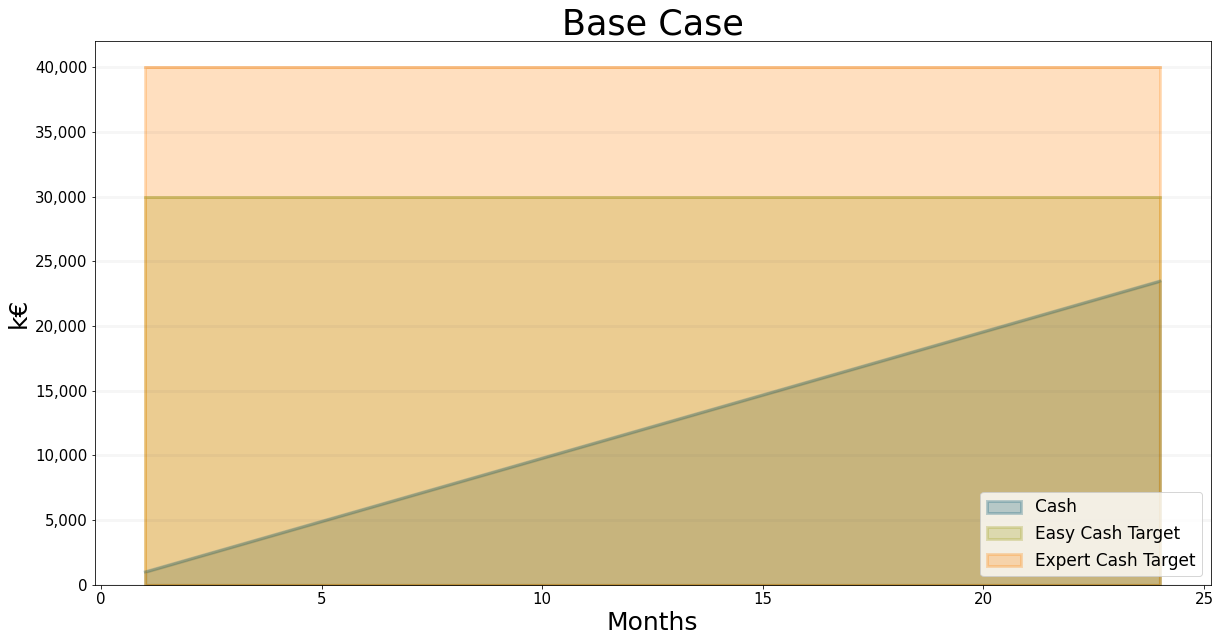

In [6]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base'], 
    equations=["cash.cash","cash.easyTargetCash","cash.expertTargetCash"],
    title="Base Case",
    x_label="Months",
    y_label="k€",
    series_names={
        "psf_base_cash.cash":"Cash",
        "psf_base_cash.easyTargetCash":"Easy Cash Target",
         "psf_base_cash.expertTargetCash":"Expert Cash Target",
    }
)

To make it easier for you to see the precise figures, I've also tabulated them in spreadsheet format. Again, you should be able to reproduce this in the simulation model.

In [7]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base'], 
    equations=["cash.cash"],
    title="Base Case",
    x_label="Months",
    y_label="k€",
    return_df=True,
    series_names={
    "psf_base_cash.cash":"Cash"
    }
)

,Cash
t,
1.0,1000.000000
2.0,1976.666667
3.0,2953.333333
4.0,3930.000000
5.0,4906.666667
6.0,5883.333333
7.0,6860.000000
8.0,7836.666667
9.0,8813.333333


Given that a project typically occupies 8 persons for 2 months, the business development staff has to generate 160/8=20 projects every two months. The effort required to acquire a project is 4 person-months, so the company has to invest 4*20=80 months every two months or 40 person months per month. So the company needs 40 business development staff for 160 project delivery staff, the ratio of business development staff to professional service staff is 1 to 4. This of course is equivalent to the ratio of 16 person months per project to 4 months of acquisition effort. 

Two things are worth noting here from a business perspective: 

- It is irrelevant whether the acquisition success rate is 100% or less \[Dash] what counts is how many project months you generate per month of business acquisition. In reality this figure will not be constant, but experience shows that it doesn't fluctuate wildly either. It will also depend on the kind of services you offer and you may have to work with different figures for different services.
- The "acquisition" overhead is quite high at 25% - typically we would like to see an overhead that is closer to 10%. But as we are assuming a 100% success rate, the figures are actually quite realistic as a whole.

Now what happens if we make the PSF grow by hiring people more professional staff?

Let's think through what will happen if we hire one person first, again you can test this scenario in the game.

Clearly if we hire a new consultant we need to assign her to business development at first, because otherwise there will not be enough projects to keep all the project delivery staff fully occupied - so the allocation of staff to business development will no longer be 20% (40/200) but actually 41/201, once the new hire is on board. 

The graph below shows what happens to the headcount and to the project backlog if we decide to hire somebody in month 1.

In [8]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth1Person":{
"points":{
"staff.hiringRate":[(1, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 
  0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 
  0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 
  0), (24, 0)],
"staff.businessDevelopmentAllocation%":[(1, 20), (2, 20), (3, 20), (4, 20), (5, 4100/201), (6, 4100/201), (7,
   4100/201), (8, 4100/201), (9, 4100/201), (10, 4100/201), (11, 4100/
  201), (12, 4100/201), (13, 4100/201), (14, 4100/201), (15, 4100/
  201), (16, 4100/201), (17, 4100/201), (18, 4100/201), (19, 4100/
  201), (20, 4100/201), (21, 4100/201), (22, 4100/201), (23, 4100/
  201), (24, 4100/201)]

}
}
})

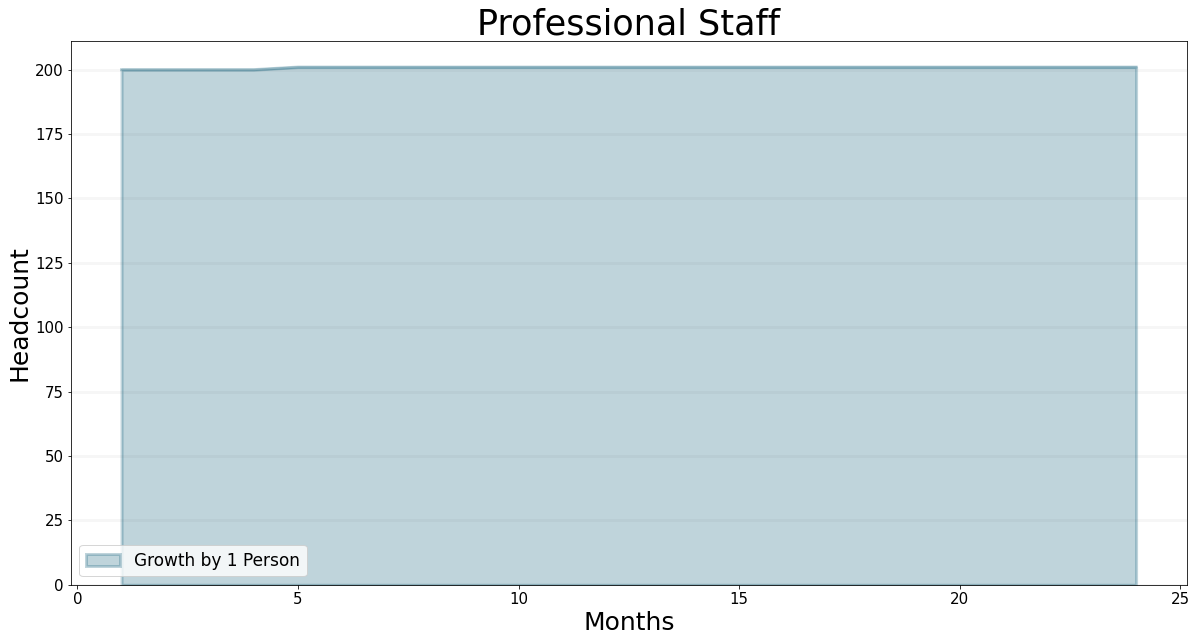

In [9]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth1Person'], 
    equations=["staff.professionalStaff"],
    title="Professional Staff",
    x_label="Months",
    y_label="Headcount",
    series_names={
        "psf_growth1Person_staff.professionalStaff":"Growth by 1 Person"
    }
)

Don't forget it takes 3 months before a new hire finally comes on board, so she doesn't arrive until month 5, and then another 6 months before the new business developer acquires her first project, hence the project backlog doesn't start building up until  the beginning of month 12. I've tabulated the data in the spreadsheet below.

In [10]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth1Person'], 
    equations=["staff.hiringRate","staff.businessDevelopmentAllocation%","staff.professionalStaff","projects.projects"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
    series_names={
        "psf_growth1Person_staff.hiringRate":"Hiring Rate",
        "psf_growth1Person_staff.professionalStaff":"Professional Staff",
        "psf_growth1Person_staff.businessDevelopmentAllocation%":"Business Development Allocation %",
        "psf_growth1Person_projects.projects":"Projects"
    }
)

,Hiring Rate,Business Development Allocation %,Professional Staff,Projects
t,,,,
1.0,1.0,20.00000,200.0,320.0
2.0,0.0,20.00000,200.0,320.0
3.0,0.0,20.00000,200.0,320.0
4.0,0.0,20.00000,200.0,320.0
5.0,0.0,20.39801,201.0,320.0
6.0,0.0,20.39801,201.0,320.0
7.0,0.0,20.39801,201.0,320.0
8.0,0.0,20.39801,201.0,320.0
9.0,0.0,20.39801,201.0,320.0


Don't forget that each project acquired feeds 8 project delivery staff - so we need to ensure that 8 project delivery persons is on board by week 39, so we need to hire those people in week 26 and adjust the staff allocation to 4100/209 in week 39.

What about the project backlog? We now have 41 business developers that generate 41 * 16/4 = 164 months of projects per month. As we have 168 project delivery staff, this means that our backlog will decrease by 4 weeks per month and this will continue until the backlog reaches a level of 164 months. The only way to avoid this is either to hire 2 business developers (matching the 1:4 ratio or to hire just 4 project developers, in which case we would have to strech the delivery of one of the projects from two months to four months.

In [11]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth9Person":{
"points":{
"staff.hiringRate":[(1, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 8), (8, 0), (9, 
  0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 
  0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 
  0), (24, 0)],
"staff.businessDevelopmentAllocation%":[(1, 20), (2, 20), (3, 20), (4, 20), (5, 4100/201), (6, 4100/201), (7, \
4100/201), (8, 4100/201), (9, 4100/201), (10, 4100/201), (11, \
4100/209), (12, 4100/209), (13, 4100/209), (14, 4100/209), (15, \
4100/209), (16, 4100/209), (17, 4100/209), (18, 4100/209), (19, \
4100/209), (20, 4100/209), (21, 4100/209), (22, 4100/209), (23, \
4100/209), (24, 4100/209)]
}
}
})

In [12]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth9Person'], 
    equations=["staff.hiringRate","staff.businessDevelopmentAllocation%","staff.professionalStaff","projects.projects","kpi.projectBacklog"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
    series_names={
        "psf_growth9Person_staff.hiringRate":"Hiring Rate",
        "psf_growth9Person_staff.professionalStaff":"Professional Staff",
        "psf_growth9Person_staff.businessDevelopmentAllocation%":"Business Development Allocation %",
        "psf_growth9Person_projects.projects":"Projects",
        "psf_growth9Person_kpi.projectBacklog":"Project Backlog"
    }
)

,Hiring Rate,Business Development Allocation %,Professional Staff,Projects,Project Backlog
t,,,,,
1.0,1.0,20.000000,200.0,320.0,2.000000
2.0,0.0,20.000000,200.0,320.0,2.000000
3.0,0.0,20.000000,200.0,320.0,2.000000
4.0,0.0,20.000000,200.0,320.0,2.000000
5.0,0.0,20.398010,201.0,320.0,1.990050
6.0,0.0,20.398010,201.0,320.0,1.990050
7.0,8.0,20.398010,201.0,320.0,1.990050
8.0,0.0,20.398010,201.0,320.0,1.990050
9.0,0.0,20.398010,201.0,320.0,1.990050


Now what about our finances? Well in the short run, because we make more revenue with more people in the 9 person scenario, our revenue increases. Our cash level decreases slightly at first and ends up being slightly above the amount we had in the base case. But we're still way of our target of EUR 26 Mio.

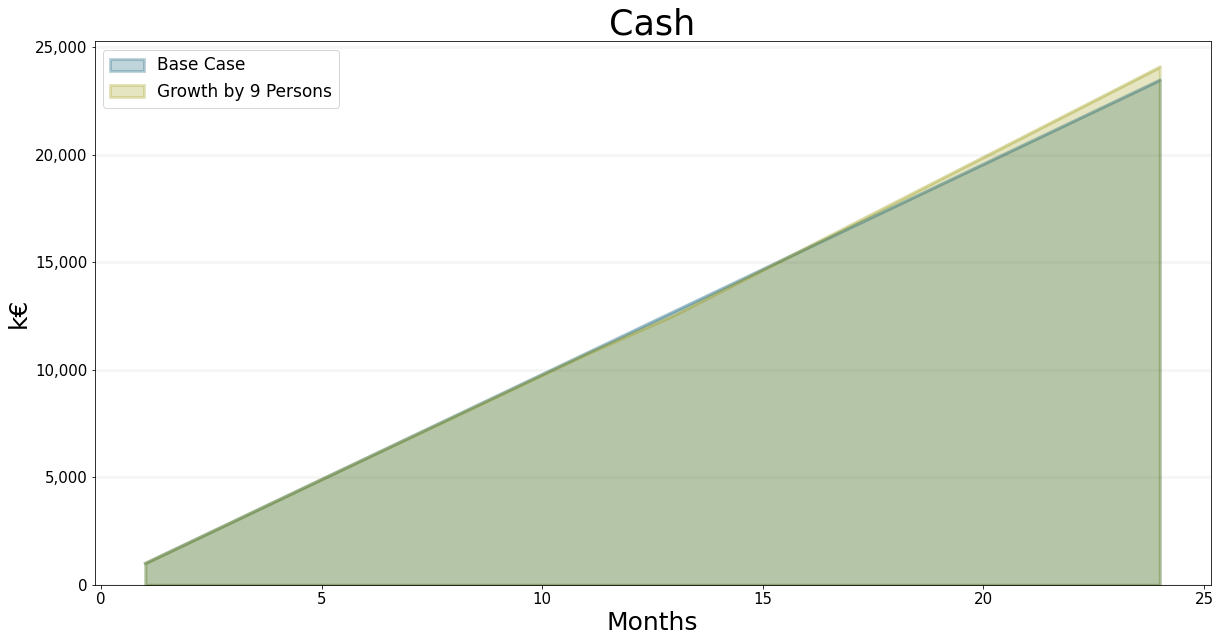

In [13]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['base','growth9Person'], 
    equations=["cash.cash"],
    title="Cash",
    x_label="Months",
    y_label="k€",
    series_names={
    "psf_base_cash.cash":"Base Case",
   "psf_growth9Person_cash.cash":"Growth by 9 Persons"
    }
)

So how many people do we need to employ in order to generate excess cash of 30 Mio.? Well given the figures we worked out above we know that this means we need to make an extra EUR 6.53 Mio compared to the base case (30 Mio - 23.46 Mio).

In [14]:
cashShortfall=1000*(df_psf_base["cash.easyTargetCash"].iloc[23]-df_psf_base["cash.cash"].iloc[23])

Which costs do we need to account for? Well if we hire newBusinessDevelopmentStaff amount of business developers straight away, they will arrive in month 5. So we will have to carry the business developer cost for 24 - 4 = 20 months.

In [15]:
businessDeveloperMonths=24-4

We also need to remember that our new project development staff will arrive in month 11 - so we will need to carry 24 - 10 = 14 weeks of their staff cost.

In [16]:
projectDeliveryMonths = 14

On the other hand, we will be making EUR 17,600 for 14 months, for each of our new project delivery staff.

We also know we have 4 * newBusinessDevelopmentStaff of project delivery staff.

In [17]:
staffCost=1000*df_psf_base["cost.staffCost"].iloc[0]/200

In [18]:
projectDeliveryFee=1000*df_psf_base["revenue.projectDeliveryFee"].iloc[0]

In [19]:
collectionTime=df_psf_base["revenue.collectionTime"].iloc[0]

So we can write the following equation:

`cashShortfall = (projectDeliveryMonths - collectionTime - 1) * projectDeliveryFee * 4 * newBusinessDevelopmentStaff - (businessDeveloperMonths - 1) * newBusinessDevelopmentStaff * staffCost -
(projectDeliveryMonths - 1) * 4 * newBusinessDevelopment * staffCost`

In [20]:
from sympy import symbols, solve

x = symbols('x')
nBuDS_expr = ((projectDeliveryMonths - collectionTime - 1)*projectDeliveryFee*4*x - (businessDeveloperMonths - 1)*
  x*staffCost - (projectDeliveryMonths - 1)*4*x*staffCost)-cashShortfall
newBusinessDevelopmentStaff = solve(nBuDS_expr)[0]

In [22]:
newBusinessDevelopmentStaff

28.4120544769631

Solving this for newBusinessDevelopmentStaff we arrive at 28.4 new business developers. This rounds to 29 new business developers and thus 116 new project delivery staff and total of 145 new staff. Try implementing this strategy in the game and see whether this helps you to achive the easy target cash level.

I've added the graph for this scenario bellow and I've also tabulated the precise figures:

In [23]:
bptk.register_scenarios(scenario_manager="psf",scenarios={
"growth145Person":{
"points":{
"staff.hiringRate":[(1, 29), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 116), (8, 0), (9, 
  0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 
  0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 
  0), (24, 0)],
"staff.businessDevelopmentAllocation%":[(1, 20), (2, 20), (3, 20), (4, 20), (5, 6900/229), (6, 6900/229), (7, 
6900/229), (8, 6900/229), (9, 6900/229), (10, 6900/229), (11, 20), 
(12, 20), (13, 20), (14, 20), (15, 20), (16, 20), (17, 20), (18, 20), 
(19, 20), (20, 20), (21, 20), (22, 20), (23, 20), (24, 20)]
}
}
})

In [24]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth145Person'], 
    equations=["staff.hiringRate","staff.businessDevelopmentAllocation%","staff.professionalStaff","projects.projects","kpi.projectBacklog","cash.cash"],
    title="Professional Staff",
    x_label="Months",
    y_label="k€",
    return_df=True,
    series_names={
        "psf_growth145Person_staff.hiringRate":"Hiring Rate",
        "psf_growth145Person_staff.professionalStaff":"Professional Staff",
        "psf_growth145Person_staff.businessDevelopmentAllocation%":"Business Development Allocation %",
        "psf_growth145Person_projects.projects":"Projects",
        "psf_growth145Person_kpi.projectBacklog":"Project Backlog",
        "psf_growth145Person_cash.cash":"Cash"
    }
)

,Hiring Rate,Business Development Allocation %,Professional Staff,Projects,Project Backlog,Cash
t,,,,,,
1.0,29.0,20.000000,200.0,320.0,2.000000,1000.000000
2.0,0.0,20.000000,200.0,320.0,2.000000,1976.666667
3.0,0.0,20.000000,200.0,320.0,2.000000,2953.333333
4.0,0.0,20.000000,200.0,320.0,2.000000,3930.000000
5.0,0.0,30.131004,229.0,320.0,1.746725,4906.666667
6.0,0.0,30.131004,229.0,320.0,1.746725,5661.000000
7.0,116.0,30.131004,229.0,320.0,1.746725,6415.333333
8.0,0.0,30.131004,229.0,320.0,1.746725,7169.666667
9.0,0.0,30.131004,229.0,320.0,1.746725,7924.000000


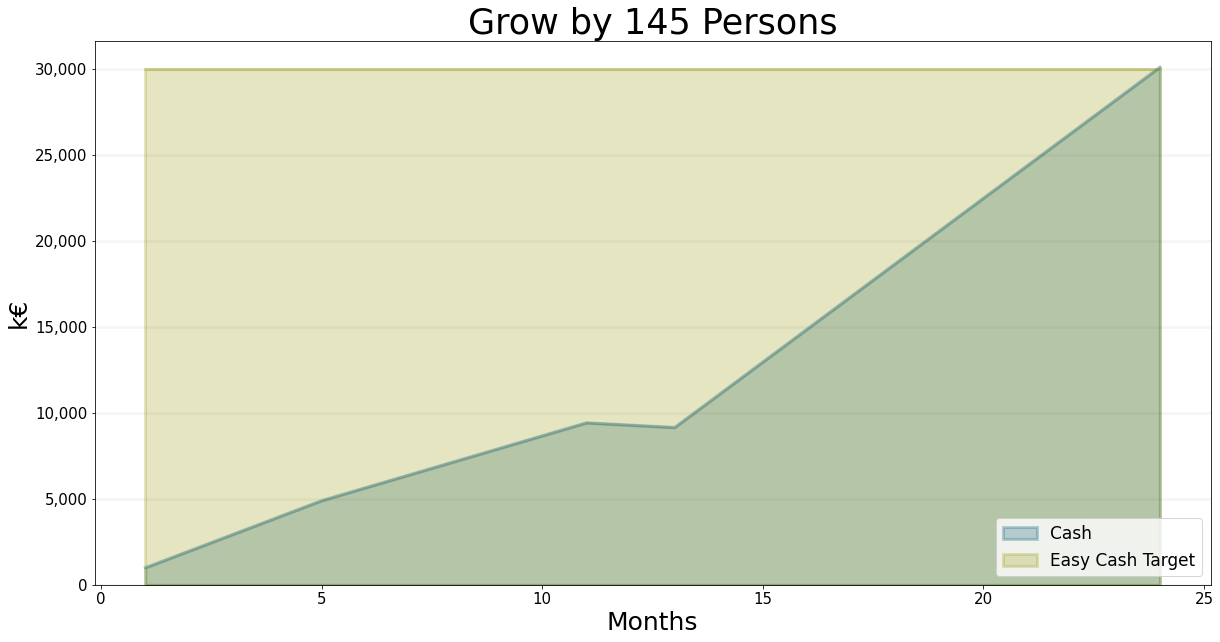

In [25]:
bptk.plot_scenarios(
    scenario_managers=["psf"],
    scenarios=['growth145Person'], 
    equations=["cash.cash","cash.easyTargetCash"],
    title="Grow by 145 Persons",
    x_label="Months",
    y_label="k€",
    series_names={
        "psf_growth145Person_cash.cash":"Cash",
        "psf_growth145Person_cash.easyTargetCash":"Easy Cash Target"
    }
)

## Summary and Learnings

Great, we have found a simple solution for the easy cash target and we did so using brainpower and not just through trial and error.
But what are the learnings for “real-life PSFs”?

The first key learning is that just a few factors have a strong impact on how your firm will grow: the ratio of business development effort to the delivery effort, the average headcount in projects, how long it takes to acquire projects and the cost of your resources. Even if we assume a very stable environment (as we do in the game), it is still quite difficult to make the right growth decisions.

Quite a few questions arise that you – as a manager of a PSF – should be able to answer:

* Can you quantify these parameters for your firm?
* How do they differ between services, customers and industries?
* Are they fairly stable or do they change over time?
* If they change, what does the change depend on, e.g. your staff expertise, market conditions…?

The second key learning is that your growth rate is directly influenced by the average headcount in your projects. So if your projects typically are staffed with eight people (e.g. management consulting), you will grow in chunks of 8 people, if your projects are staffed with 40 people (e.g. IT services), then you will grow in chunks of 40 people. So how you staff your projects will have a big effect on your growth pattern – to put it simply, if you want to grow faster, it is better to deploy larger project teams (and hence shorten the duration of your projects). Of course, this will in part depend on your customer situation, but it is worth bearing in mind when you design your services and staff your projects.

Again there are a few questions for you to ponder:

* What does the staff size in your projects depend on?
* Could you design your services such that you can work in parallel better (and thus deliver results faster)?

In tne next chapter, we will tackle the [_expert cash target_](make_your_psf_grow_part_4.ipynb)